### Load the Data

In [5]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly.graph_objects as go


In [1]:
#Connect to  Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Sprint 1/Sprint_Output/micro_world.csv', encoding='ISO-8859-1')
data_17 = pd.read_csv('/content/drive/MyDrive/Sprint 1/Sprint_Output/micro_world_2017.csv', encoding='ISO-8859-1')

# East and South Asia

In [ ]:
east_south_asia = data[(data['regionwb'] == 'East Asia & Pacific (excluding high income)')|
                (data['regionwb'] == 'South Asia')]

east_south_asia_17 = data_17[(data_17['regionwb'] == 'East Asia & Pacific (excluding high income)')|
                (data_17['regionwb'] == 'South Asia')]

east_south_asia_17.head()
                                     
    

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
0,Afghanistan,AFG,South Asia,19456060.0,139880545,1.936754,1,18.0,2.0,1,...,4,4,4,2.0,2,5.0,0.0,NaN,0.0,NaN
1,Afghanistan,AFG,South Asia,19456060.0,111705622,0.332867,2,25.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
2,Afghanistan,AFG,South Asia,19456060.0,128866217,1.338906,2,40.0,1.0,2,...,4,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN
3,Afghanistan,AFG,South Asia,19456060.0,138171768,0.275619,2,45.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
4,Afghanistan,AFG,South Asia,19456060.0,125156190,0.629304,1,30.0,1.0,4,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN


In [ ]:
covid_worried_ea = east_south_asia[
    [
        'wpid_random',
        'economy',
        'fin45_1'
    ]
]
covid_worried_ea.head()

,wpid_random,economy,fin45_1
0,140343632,Afghanistan,2.0
1,167823412,Afghanistan,1.0
2,182483450,Afghanistan,1.0
3,170778240,Afghanistan,3.0
4,170712642,Afghanistan,1.0


In [ ]:
covid_worried_grouped = covid_worried_ea.groupby(
    ['economy', 'fin45_1']).agg(
    count = ('wpid_random', 'count')
    
).reset_index()
covid_worried_grouped.head()

,economy,fin45_1,count
0,Afghanistan,1.0,542
1,Afghanistan,2.0,364
2,Afghanistan,3.0,90
3,Afghanistan,4.0,6
4,Bangladesh,1.0,592


In [ ]:
covid_worried_grouped['total_population'] = covid_worried_grouped.groupby('economy')['count'].transform('sum')
covid_worried_grouped.head()

,economy,fin45_1,count,total_population
0,Afghanistan,1.0,542,1002
1,Afghanistan,2.0,364,1002
2,Afghanistan,3.0,90,1002
3,Afghanistan,4.0,6,1002
4,Bangladesh,1.0,592,1000


In [ ]:
covid_worried_grouped['count_percentage'] = (covid_worried_grouped['count'] / covid_worried_grouped['total_population']) * 100
covid_worried_grouped.head()

,economy,fin45_1,count,total_population,count_percentage
0,Afghanistan,1.0,542,1002,54.091816
1,Afghanistan,2.0,364,1002,36.327345
2,Afghanistan,3.0,90,1002,8.982036
3,Afghanistan,4.0,6,1002,0.598802
4,Bangladesh,1.0,592,1000,59.200000


In [ ]:
covid_most_worried =covid_worried_grouped[covid_worried_grouped['fin45_1'] == 1]
covid_most_worried = covid_most_worried.sort_values('count_percentage', ascending = False)
covid_most_worried.head()

,economy,fin45_1,count,total_population,count_percentage
8,Cambodia,1.0,796,1000,79.600000
16,Indonesia,1.0,746,1062,70.244821
11,India,1.0,2072,3000,69.066667
21,Lao PDR,1.0,680,1000,68.000000
46,Philippines,1.0,627,1000,62.700000


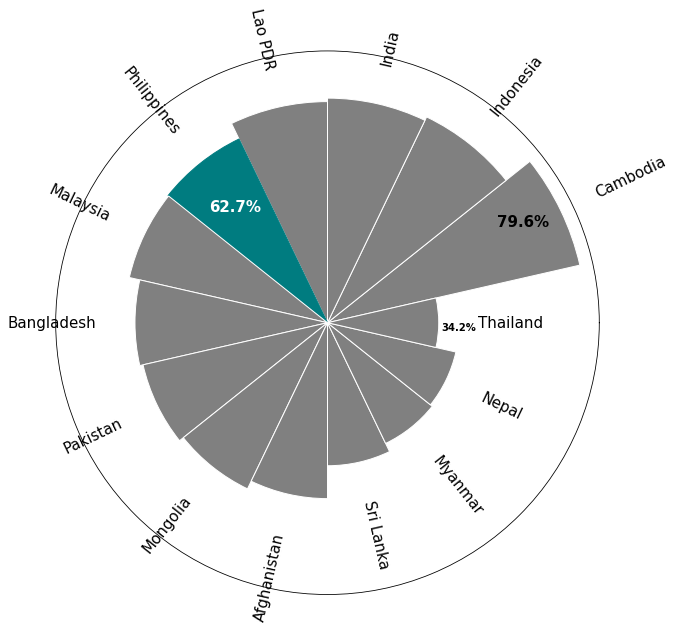

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = 100

#set heights and width
heights = covid_most_worried['count_percentage']
width = 2*np.pi / len(covid_most_worried.index)

#set index and angle
indexes = list(range(1, len(covid_most_worried.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color= 'grey')
bars[4].set_color('#007C80')
labelPadding = 12

for bar, angle, height, label in zip(bars,angles, heights, covid_most_worried['economy']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor",
           size = 15)
    ax.set_thetagrids([], labels=[], grid = False)


ax.yaxis.grid(False)
ax.set_yticklabels([]) 

ax.text ( x = 12.5, y = 35, s = '34.2%', weight = 'bold', size = 10)
ax.text ( x = 14.95, y = 50, s = '62.7%', weight = 'bold', size = 15, color= 'white')
ax.text ( x = 119.9, y = 60, s = '79.6%', weight = 'bold', size = 15)

plt.show()

*Philippines is 5th among the east asia and South Asia region countriesexcluding india who fear about the financial threat of Covid*

## Philippine Data

In [ ]:
#Filtering Philippines Data
ph_data = data[data['economy'] == 'Philippines']
ph_data['emp_in'] = ph_data['emp_in'].replace({1: 'Employed', 2: 'Unemployed'})
ph_data['inc_q'] = ph_data['inc_q'].replace({ 1: 'poorest 20%',
                                                               2: 'second 20%',
                                                               3: 'middle 20%',
                                                               4: 'fourth 20%',
                                                               5: 'richest 20%'})

ph_data_17 = data_17[data_17['economy'] == 'Philippines']
ph_data_17['emp_in'] = ph_data_17['emp_in'].replace({1: 'Employed', 2: 'Unemployed'})
ph_data_17['inc_q'] = ph_data_17['inc_q'].replace({ 1: 'poorest 20%',
                                                               2: 'second 20%',
                                                               3: 'middle 20%',
                                                               4: 'fourth 20%',
                                                               5: 'richest 20%'})
ph_data_17.head()

<ipython-input-17-da4cbacd98b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_data['emp_in'] = ph_data['emp_in'].replace({1: 'Employed', 2: 'Unemployed'})
<ipython-input-17-da4cbacd98b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_data['inc_q'] = ph_data['inc_q'].replace({ 1: 'poorest 20%',
<ipython-input-17-da4cbacd98b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,poorest 20%,...,4,2,2,4.0,2,3.0,0.0,NaN,0.0,NaN
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,richest 20%,...,1,4,4,4.0,4,1.0,0.0,0.0,1.0,1.0
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,fourth 20%,...,4,2,2,4.0,2,5.0,0.0,NaN,0.0,NaN
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,richest 20%,...,4,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,richest 20%,...,1,1,4,2.0,2,1.0,0.0,NaN,0.0,NaN


### Financially Worried

In [ ]:
fin_worried = ph_data [
    [
        'wpid_random',
        'fin44a',
        'fin44b',
        'fin44c',
        'fin44d'
    ]
]
fin_worried =  fin_worried.reset_index()
fin_worried

,index,wpid_random,fin44a,fin44b,fin44c,fin44d
0,90750,175160143,2,2,2,3
1,90751,196715468,2,2,2,2
2,90752,137538586,3,3,3,3
3,90753,132202737,2,2,2,2
4,90754,139964446,2,1,3,3
...,...,...,...,...,...,...
995,91745,120355886,1,1,1,1
996,91746,169989028,2,1,2,2
997,91747,130140191,2,1,1,1
998,91748,206944040,1,1,1,1


In [ ]:
#Financially Worried: old age
fin_worried['fin44a'].value_counts(normalize = True)*100

1    44.7
2    43.9
3    11.4
Name: fin44a, dtype: float64

In [ ]:
#Financially Worried: medical cost
fin_worried['fin44b'].value_counts(normalize = True)*100

1    60.1
2    29.0
3    10.9
Name: fin44b, dtype: float64

In [ ]:
#Financially Worried: bills
fin_worried['fin44c'].value_counts(normalize = True)*100

2    42.7
1    38.7
3    18.6
Name: fin44c, dtype: float64

In [ ]:
#Financially Worried: Education
fin_worried['fin44d'].value_counts(normalize = True)*100

1    37.0
2    32.1
3    30.9
Name: fin44d, dtype: float64

In [ ]:
fin_worried_radar = fin_worried[
    [
        'fin44a',
        'fin44b',
        'fin44c',
        'fin44d'
    ]
]

fin_worried_radar

,fin44a,fin44b,fin44c,fin44d
0,2,2,2,3
1,2,2,2,2
2,3,3,3,3
3,2,2,2,2
4,2,1,3,3
...,...,...,...,...
995,1,1,1,1
996,2,1,2,2
997,2,1,1,1
998,1,1,1,1


In [ ]:
fin_worried_radar = fin_worried_radar.rename(columns = {'fin44a' : 'old age',
                                    'fin44b' : 'medical cost',
                                    'fin44c' : 'bills',
                                    'fin44d' : 'education' 
                                   }
                        )
fin_worried_radar

,old age,medical cost,bills,education
0,2,2,2,3
1,2,2,2,2
2,3,3,3,3
3,2,2,2,2
4,2,1,3,3
...,...,...,...,...
995,1,1,1,1
996,2,1,2,2
997,2,1,1,1
998,1,1,1,1


In [ ]:
df = pd.DataFrame({
   'labels': ['old age', 'medical cost', 'bills', 'education'],
   'Verry Worried': [sum(fin_worried_radar['old age']==1), sum(fin_worried_radar['medical cost']==1), sum(fin_worried_radar['bills']==1), sum(fin_worried_radar['education']==1)],
   'Somewhat Worried': [sum(fin_worried_radar['old age']==2), sum(fin_worried_radar['medical cost']==2), sum(fin_worried_radar['bills']==2), sum(fin_worried_radar['education']==2)],
   'Not Worried at all': [sum(fin_worried_radar['old age']==3), sum(fin_worried_radar['medical cost']==3), sum(fin_worried_radar['bills']==3), sum(fin_worried_radar['education']==3)]
})
df

,labels,Verry Worried,Somewhat Worried,Not Worried at all
0,old age,447,439,114
1,medical cost,601,290,109
2,bills,387,427,186
3,education,370,321,309


In [ ]:
# Create a trace for each label
traces = []
for i in range(len(df)):
    traces.append(go.Scatterpolar(
        r=[df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3]],
        theta=['Very Worried', 'Somewhat Worried', 'Not Worried at all'],
        fill='toself',
        name=df.iloc[i, 0]
    ))

# Define the layout of the chart
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 650]
        )
    ),
    showlegend=True
)

# Create the chart figure
fig = go.Figure(data=traces, layout=layout)

# Display the chart
fig.show()

### Borrowed 

In [ ]:
borrowed = ph_data[
    [
        'wpid_random',
        'borrowed',
        'fin20', #Borrowed for medical purposes
        'fin22a', #Borrowed from a financial institution
        'fin22b' #Borrowed from family or friends
    ]
]
borrowed   
    
    

,wpid_random,borrowed,fin20,fin22a,fin22b
90750,175160143,0,2,2,2
90751,196715468,0,2,2,2
90752,137538586,1,2,2,2
90753,132202737,1,2,2,2
90754,139964446,0,2,2,2
...,...,...,...,...,...
91745,120355886,1,1,1,1
91746,169989028,1,1,1,1
91747,130140191,0,2,2,2
91748,206944040,1,1,2,1


In [ ]:
borrowed = borrowed[borrowed['borrowed'] == 1]
borrowed

,wpid_random,borrowed,fin20,fin22a,fin22b
90752,137538586,1,2,2,2
90753,132202737,1,2,2,2
90755,163788676,1,1,1,2
90756,138015957,1,2,2,2
90758,177313423,1,1,2,1
...,...,...,...,...,...
91742,145656201,1,1,2,1
91745,120355886,1,1,1,1
91746,169989028,1,1,1,1
91748,206944040,1,1,2,1


In [ ]:
borrowed_medical = borrowed[borrowed['fin20'] == 1]
borrowed_medical

,wpid_random,borrowed,fin20,fin22a,fin22b
90755,163788676,1,1,1,2
90758,177313423,1,1,2,1
90759,175913753,1,1,1,2
90763,150082972,1,1,1,1
90767,204810361,1,1,2,1
...,...,...,...,...,...
91739,209333164,1,1,1,1
91742,145656201,1,1,2,1
91745,120355886,1,1,1,1
91746,169989028,1,1,1,1


In [ ]:
borrowed_medical['fin22b'].value_counts(normalize = True)*100

1    73.451327
2    26.548673
Name: fin22b, dtype: float64

*73 percent of those who borrowed for medical use, borrowed from their family or friends*

In [ ]:
borrowed_medical['fin22b'].value_counts(normalize = True)*100

1    73.451327
2    26.548673
Name: fin22b, dtype: float64

*Out from those who borrowed for medical, they said they borrow it from their Family or Friends*

### Government Help

In [ ]:
#filter columns
government_help = ph_data[
    [
        'wpid_random',
        'emp_in',
        'inc_q',
        'fin37'
    ]
]

government_help_17 = ph_data_17[
    [
        'wpid_random',
        'emp_in',
        'inc_q',
        'fin37'
    ]
]
government_help_17        

,wpid_random,emp_in,inc_q,fin37
114292,180129353,0.0,poorest 20%,1
114293,171987745,Employed,richest 20%,2
114294,178228576,Employed,fourth 20%,1
114295,193725076,Employed,richest 20%,2
114296,194711242,Employed,richest 20%,1
...,...,...,...,...
115287,151988960,Employed,poorest 20%,2
115288,138300933,0.0,poorest 20%,2
115289,134514859,Employed,fourth 20%,2
115290,145841428,Employed,fourth 20%,2


In [ ]:
government_help['received_govnt_help'] = government_help.apply(
    lambda x: 1 if x.fin37 == 1 else 0, axis = 1
)
government_help
#2017

government_help_17['received_govnt_help'] = government_help_17.apply(
    lambda x: 1 if x.fin37 == 1 else 0, axis = 1
)
government_help_17

<ipython-input-33-524199c0f9b0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-524199c0f9b0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,wpid_random,emp_in,inc_q,fin37,received_govnt_help
114292,180129353,0.0,poorest 20%,1,1
114293,171987745,Employed,richest 20%,2,0
114294,178228576,Employed,fourth 20%,1,1
114295,193725076,Employed,richest 20%,2,0
114296,194711242,Employed,richest 20%,1,1
...,...,...,...,...,...
115287,151988960,Employed,poorest 20%,2,0
115288,138300933,0.0,poorest 20%,2,0
115289,134514859,Employed,fourth 20%,2,0
115290,145841428,Employed,fourth 20%,2,0


In [ ]:
Total_received_help = (sum(government_help['received_govnt_help'])/1000)*100
Total_received_help

32.9

*Only 3 out of 10 Filipinos Received Help from the government during the Pandemic!*

#### Employment

emp_in = 1: IN the workforce
       = 2: out of the workforce

received_govnt_help = 0 : did not receive any financial help
                    = 1 : received financial help

In [ ]:
employment_data = government_help.groupby('emp_in')['received_govnt_help'].value_counts()
employment_data

emp_in      received_govnt_help
Employed    0                      475
            1                      232
Unemployed  0                      196
            1                       97
Name: received_govnt_help, dtype: int64

In [ ]:
employment_data = government_help.groupby(
    ['emp_in']).agg(
    total_population = ('wpid_random', 'count'),
    total_received_help  = ('received_govnt_help', 'sum')
).reset_index()
employment_data
    

,emp_in,total_population,total_received_help
0,Employed,707,232
1,Unemployed,293,97


In [ ]:
employment_data['% of population in the workforce who received help'] = employment_data['total_received_help']*100/employment_data['total_population']
employment_data

,emp_in,total_population,total_received_help,% of population in the workforce who received help
0,Employed,707,232,32.814710
1,Unemployed,293,97,33.105802


In [ ]:
employment_data

,emp_in,total_population,total_received_help,% of population in the workforce who received help
0,Employed,707,232,32.814710
1,Unemployed,293,97,33.105802


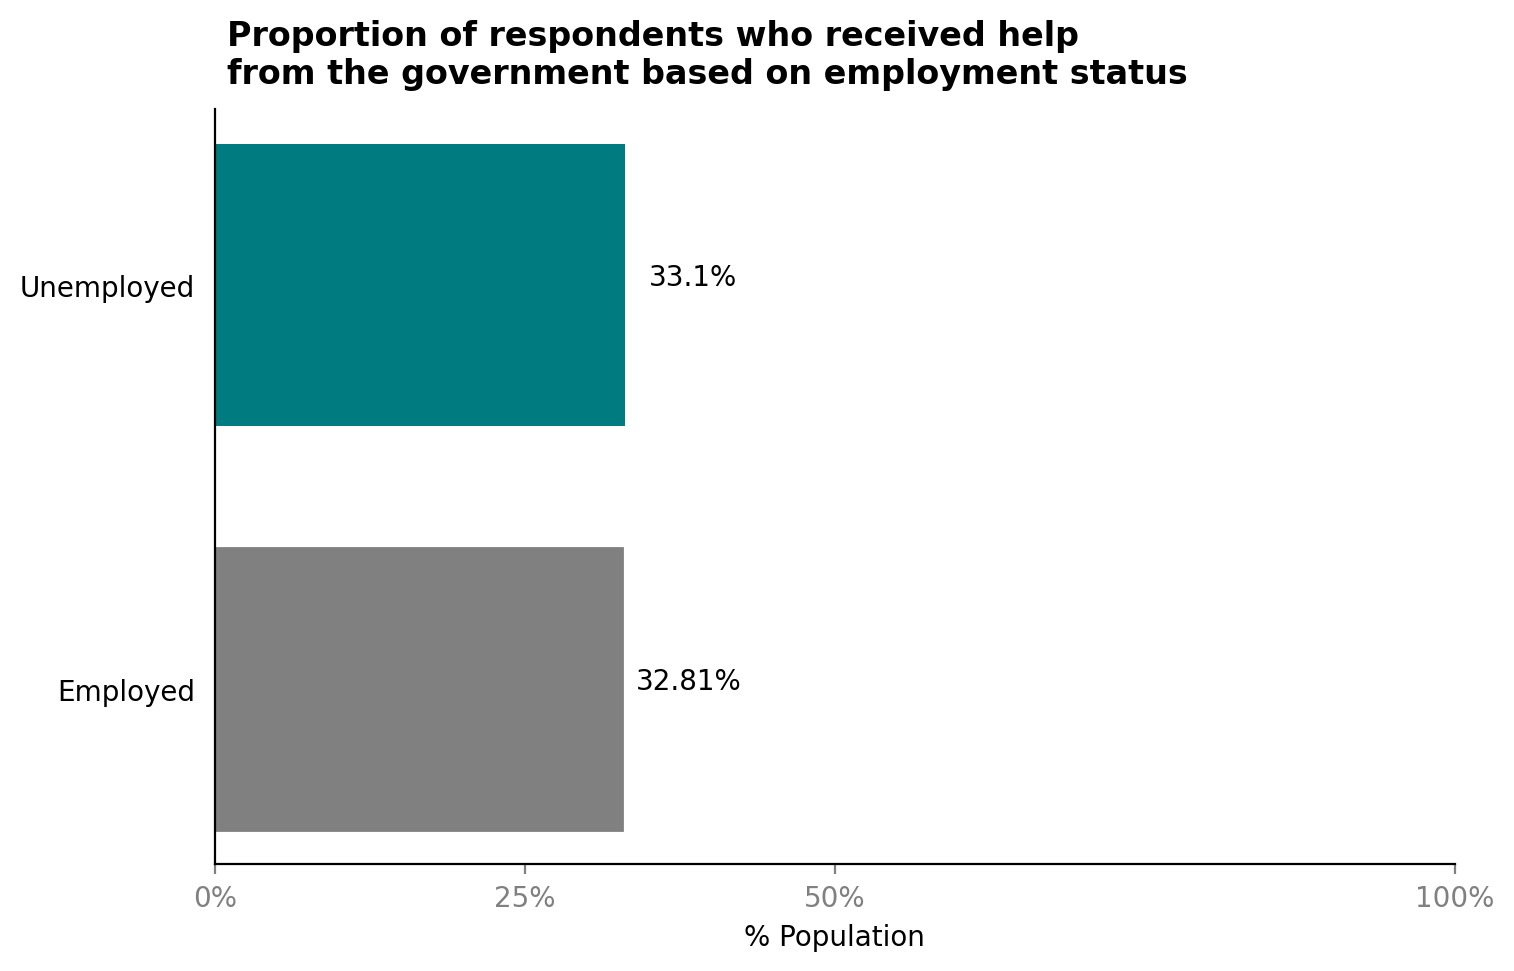

In [ ]:

#create a subplot with small size
fig, ax = plt.subplots(figsize=(8, 5), dpi = 200)

#Run Barchart
bar_chart = ax.barh(employment_data['emp_in'],
                    employment_data['% of population in the workforce who received help'],
    height = 0.7, #set width
    color = '#007C80') #set color


#remove spines
for location in [ 'right', 'top']:
   ax.spines[location].set_visible(False)

#Set the first bar to color Gret
bar_chart[0].set_color('grey')

#set y limits until 100    
ax.set_xticks([0, 25, 50, 100])

#Set the name of the limits to percenge
ax.set_xticklabels(['0%', '25%', '50%', '100%'])

#remove ticks
ax.tick_params(top=False, left=False)

#make the numbers on the left grey
ax.tick_params(axis='x', colors='grey')

#input title
ax.text(x = 1, y = 1.5, s = 'Proportion of respondents who received help\nfrom the government based on employment status', weight = 'bold',  size = 12)

#manually input the text '34.08%'
ax.text( x = 34, y = 0.0001, s = '32.81%', weight = 'normal', size = 10)

#manually input '10.7%'
ax.text( x = 35, y = 1, s = '33.1%', weight = 'normal', size = 10)

ax.set_xlabel('% Population')

#show the plot
plt.show()

*Still, only 3-4 people  out of 10 unemployed received help from the Government*

In [ ]:
#Not
unemployed_data = government_help[government_help['emp_in'] == 'Unemployed']
unemployed_data

,wpid_random,emp_in,inc_q,fin37,received_govnt_help
90756,138015957,Unemployed,second 20%,2,0
90759,175913753,Unemployed,richest 20%,2,0
90762,185608286,Unemployed,second 20%,1,1
90764,129306373,Unemployed,richest 20%,2,0
90769,141041364,Unemployed,second 20%,1,1
...,...,...,...,...,...
91716,176624518,Unemployed,richest 20%,1,1
91736,202603467,Unemployed,middle 20%,2,0
91737,134380163,Unemployed,poorest 20%,2,0
91738,187381149,Unemployed,middle 20%,1,1


In [ ]:
unemployed_grouped = unemployed_data.groupby(
    ['emp_in']).agg(
    total_population = ('wpid_random', 'count'),
    total_received_help  = ('received_govnt_help', 'sum')
).reset_index()
unemployed_grouped
    

,emp_in,total_population,total_received_help
0,Unemployed,293,97


In [ ]:
unemployed_grouped['% of unemployed population who received help'] = unemployed_grouped['total_received_help']*100/293
unemployed_grouped

,emp_in,total_population,total_received_help,% of unemployed population who received help
0,Unemployed,293,97,33.105802


*Still, only 3 out of 10 unemployed Filipinos received help from the Government!*

#### Household Income

In [ ]:
government_help.groupby('inc_q')['received_govnt_help'].value_counts(normalize = True)*100

inc_q        received_govnt_help
fourth 20%   0                      65.686275
             1                      34.313725
middle 20%   0                      64.039409
             1                      35.960591
poorest 20%  0                      64.084507
             1                      35.915493
richest 20%  0                      73.421927
             1                      26.578073
second 20%   0                      63.333333
             1                      36.666667
Name: received_govnt_help, dtype: float64

In [ ]:
government_help.head()

,wpid_random,emp_in,inc_q,fin37,received_govnt_help
90750,175160143,Employed,richest 20%,2,0
90751,196715468,Employed,fourth 20%,2,0
90752,137538586,Employed,richest 20%,2,0
90753,132202737,Employed,richest 20%,2,0
90754,139964446,Employed,middle 20%,2,0


In [ ]:
income_data = government_help.groupby(
    ['inc_q']).agg(
    total_population = ('wpid_random', 'count'),
    total_received_help  = ('received_govnt_help', 'sum')
).reset_index()
income_data

#2017
income_data_17 = government_help_17.groupby(
    ['inc_q']).agg(
    total_population = ('wpid_random', 'count'),
    total_received_help  = ('received_govnt_help', 'sum')
).reset_index()
income_data_17

,inc_q,total_population,total_received_help
0,fourth 20%,209,43
1,middle 20%,203,41
2,poorest 20%,192,67
3,richest 20%,228,45
4,second 20%,168,39


In [ ]:
#2023
income_data['% of population who received help'] = income_data['total_received_help']*100/income_data['total_population']
income_data

,inc_q,total_population,total_received_help,% of population who received help
0,fourth 20%,204,70,34.313725
1,middle 20%,203,73,35.960591
2,poorest 20%,142,51,35.915493
3,richest 20%,301,80,26.578073
4,second 20%,150,55,36.666667


In [ ]:
#2017
income_data_17['% of population who received help'] = income_data_17['total_received_help']*100/income_data_17['total_population']
income_data_17

,inc_q,total_population,total_received_help,% of population who received help
0,fourth 20%,209,43,20.574163
1,middle 20%,203,41,20.197044
2,poorest 20%,192,67,34.895833
3,richest 20%,228,45,19.736842
4,second 20%,168,39,23.214286


In [ ]:
custom_order = {'richest 20%': 0, 'fourth 20%':1, 'middle 20%':2,
         'second 20%' : 3, 'poorest 20%':4}

income_data = income_data.sort_values(by = ['inc_q'], key = lambda x: x.map(custom_order))
income_data

#2017
income_data_17 = income_data_17.sort_values(by = ['inc_q'], key = lambda x: x.map(custom_order))
income_data_17

,inc_q,total_population,total_received_help,% of population who received help
3,richest 20%,228,45,19.736842
0,fourth 20%,209,43,20.574163
1,middle 20%,203,41,20.197044
4,second 20%,168,39,23.214286
2,poorest 20%,192,67,34.895833


##### 2023 Line Plot with only 40% as highest in Y axis

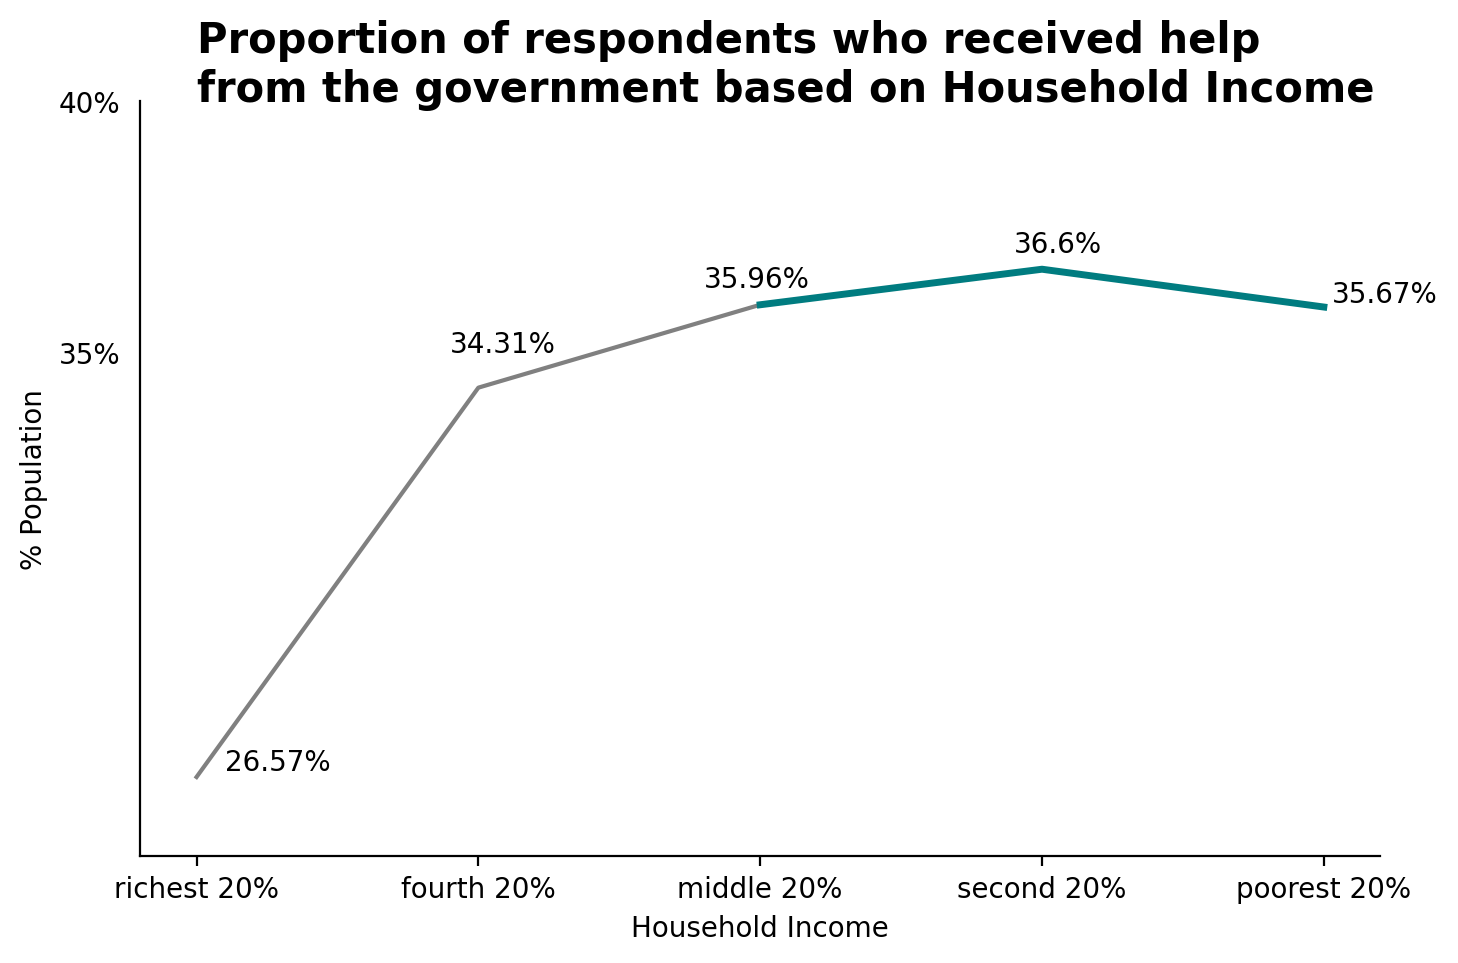

In [ ]:
#create a subplot with small size
fig, ax = plt.subplots(figsize=(8, 5), dpi = 200)

ax.plot(income_data['inc_q'], 
        income_data['% of population who received help'],
        color = 'grey')

ax.plot(income_data['inc_q'][-3:],
         income_data['% of population who received help'][-3:],
         color = '#007C80',
         linewidth = 2.5)
ax.tick_params(left=0) 
for location in ['right', 'top']:
        ax.spines[location].set_visible(False)



ax.text( x = 2.9, y = 37, s = '36.6%', weight = 'normal', size = 10)
ax.text( x = 4.03, y = 36, s = '35.67%', weight = 'normal', size = 10)
ax.text( x = 1.8, y = 36.3, s = '35.96%', weight = 'normal', size = 10)
ax.text( x = 0.9, y = 35, s = '34.31%', weight = 'normal', size = 10)
ax.text( x = 0.1, y = 26.7, s = '26.57%', weight = 'normal', size = 10)

ax.set_yticks([25, 35, 40])
ax.set_yticklabels(['25%', '35%', '40%'])

ax.set_ylabel('% Population')
ax.set_xlabel('Household Income')
ax.text(x = 0.0001, y = 40, s = 'Proportion of respondents who received help\nfrom the government based on Household Income', weight = 'bold',  size = 15)

ax.set_yticks([28, 35, 40])
plt.show()

#### 2023 Line Plot with only 100% as highest in Y axis

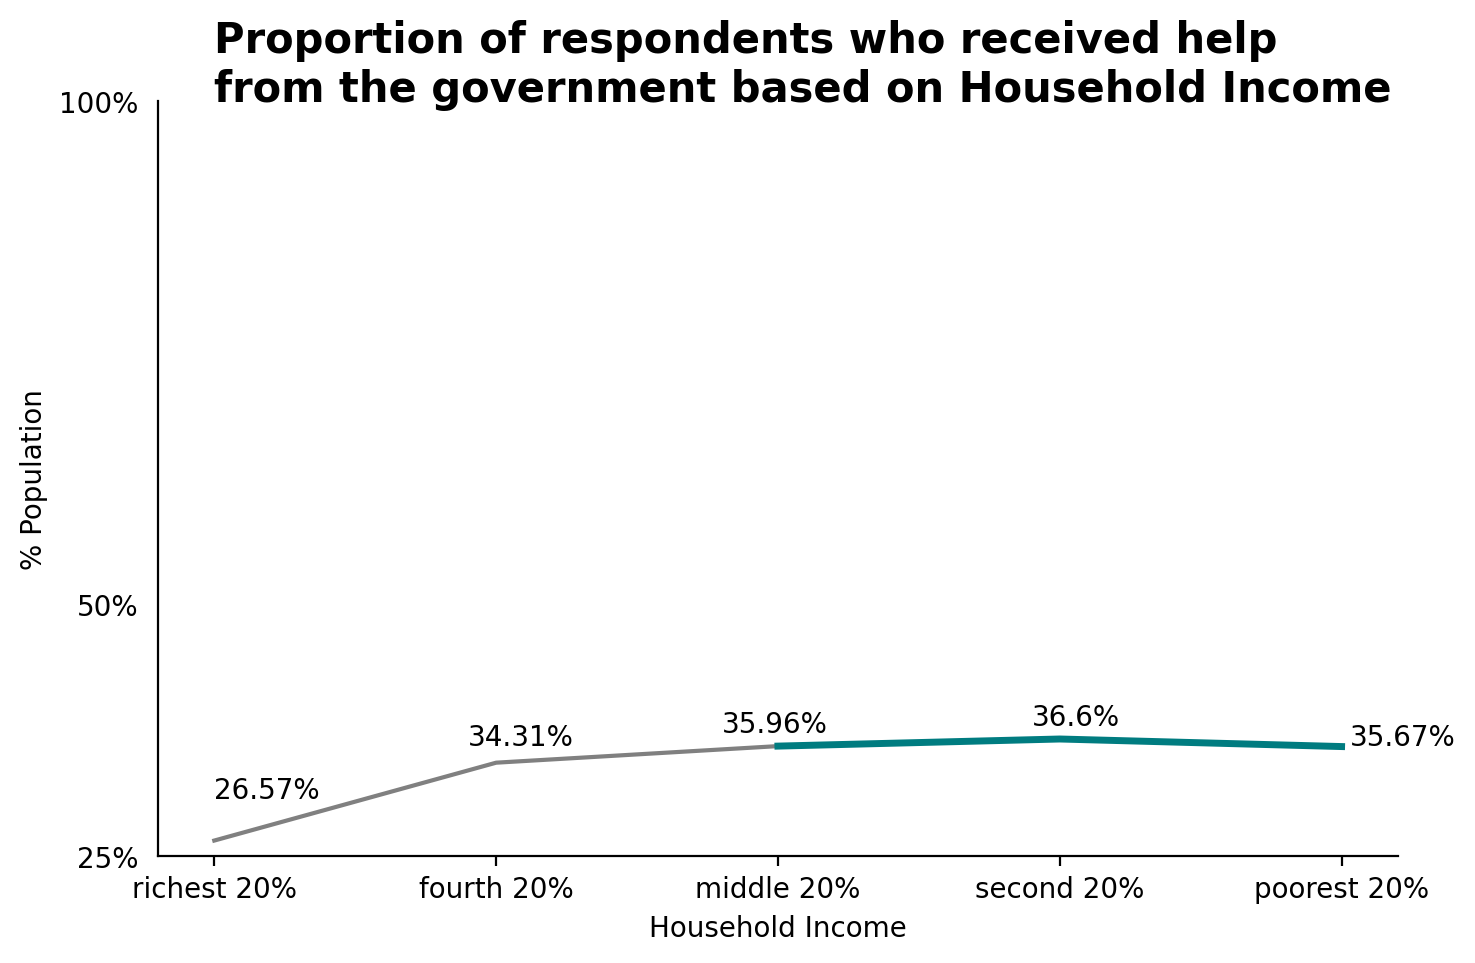

In [ ]:
#create a subplot with small size
fig, ax = plt.subplots(figsize=(8, 5), dpi = 200)

ax.plot(income_data['inc_q'], 
        income_data['% of population who received help'],
        color = 'grey')

ax.tick_params(left=0) 
for location in ['right', 'top']:
        ax.spines[location].set_visible(False)


ax.plot(income_data['inc_q'][-3:],
         income_data['% of population who received help'][-3:],
         color = '#007C80',
         linewidth = 2.5)
ax.set_yticks([25, 50, 75, 100])
ax.set_yticklabels(['25%', '50%', '75%', '100%'])

ax.set_ylabel('% Population')
ax.set_xlabel('Household Income')

ax.text( x = 2.9, y = 38, s = '36.6%', weight = 'normal', size = 10)
ax.text( x = 4.03, y = 36, s = '35.67%', weight = 'normal', size = 10)
ax.text( x = 1.8, y = 37.3, s = '35.96%', weight = 'normal', size = 10)
ax.text( x = 0.9, y = 36, s = '34.31%', weight = 'normal', size = 10)
ax.text( x = 0.0001, y = 30.7, s = '26.57%', weight = 'normal', size = 10)
ax.set_yticks([25, 50, 100])

#input title
ax.text(x = 0.0001, y = 100, s = 'Proportion of respondents who received help\nfrom the government based on Household Income', weight = 'bold',  size = 15)
plt.show()

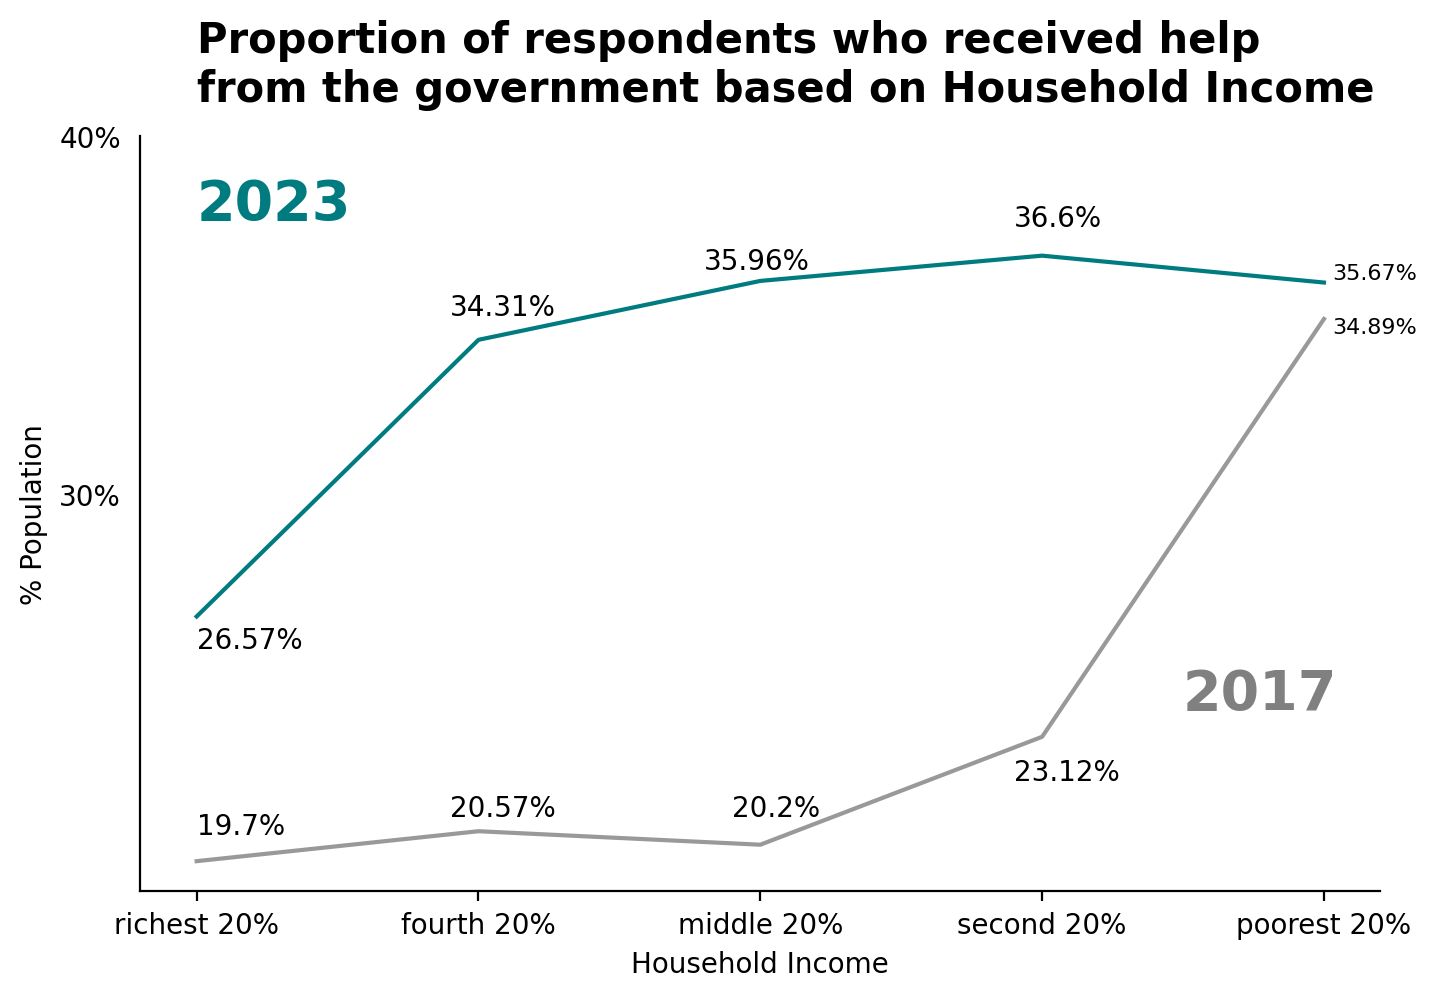

In [ ]:
#create a subplot with small size
fig, ax = plt.subplots(figsize=(8, 5), dpi = 200)

ax.plot(income_data['inc_q'], 
        income_data['% of population who received help'],
        color = '#007C80')

ax.plot(income_data_17['inc_q'], 
        income_data_17['% of population who received help'],
        color = 'grey',
        alpha = 0.8)

ax.tick_params(left=0) 
for location in ['right', 'top']:
        ax.spines[location].set_visible(False)


#Set Axis Label names
ax.set_ylabel('% Population')
ax.set_yticks([30, 40])
ax.set_yticklabels(['30%', '40%'])

ax.set_xlabel('Household Income')

#Manually Set Texxts
ax.text( x = 2.9, y = 37.5, s = '36.6%', weight = 'normal', size = 10)
ax.text( x = 2.9, y = 22, s = '23.12%', weight = 'normal', size = 10)
ax.text( x = 4.03, y = 36, s = '35.67%', weight = 'normal', size = 8)
ax.text( x = 4.03, y = 34.5, s = '34.89%', weight = 'normal', size = 8)
ax.text( x = 1.9, y = 21, s = '20.2%', weight = 'normal', size = 10)
ax.text( x = 1.8, y = 36.3, s = '35.96%', weight = 'normal', size = 10)
ax.text( x = 0.9, y = 21, s = '20.57%', weight = 'normal', size = 10)
ax.text( x = 0.9, y = 35, s = '34.31%', weight = 'normal', size = 10)
ax.text( x = 0.0001, y = 20.5, s = '19.7%', weight = 'normal', size = 10)
ax.text( x = 0.0001, y = 25.7, s = '26.57%', weight = 'normal', size = 10)

ax.text( x = 0.0001, y = 37.7, s = '2023', weight = 'bold', size = 20, color = '#007C80' )
ax.text( x = 3.5, y = 24, s = '2017', weight = 'bold', size = 20, color = 'grey' )

ax.text(x = 0.0001, y = 41, s = 'Proportion of respondents who received help\nfrom the government based on Household Income', weight = 'bold',  size = 15)

plt.show()

### Financial Account